In [ ]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Question 1(a): Probability of at least 4 smokers in a sample of 10
p_smoker = 0.3
n_smoker = 10
k_smoker = 4
prob_at_least_4 = 1 - binom.cdf(k_smoker - 1, n_smoker, p_smoker)
print(f"Probability of at least 4 smokers in a sample of 10: {prob_at_least_4:.4f}")

Probability of at least 4 smokers in a sample of 10: 0.3504


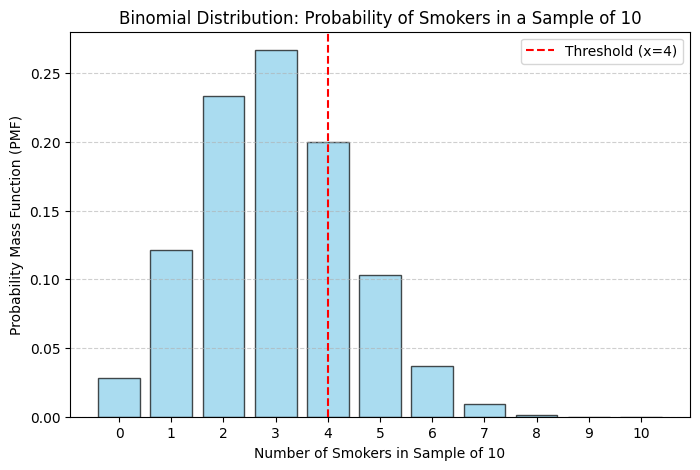

In [ ]:
# Question 1(b): Plot Binomial Distribution
x = np.arange(0, n_smoker + 1)
y = binom.pmf(x, n_smoker, p_smoker)

plt.figure(figsize=(8, 5))
plt.bar(x, y, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=4, color='red', linestyle='dashed', label="Threshold (x=4)")
plt.xlabel("Number of Smokers in Sample of 10")
plt.ylabel("Probability Mass Function (PMF)")
plt.title("Binomial Distribution: Probability of Smokers in a Sample of 10")
plt.xticks(range(n_smoker + 1))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# Question 2(a): Probability of exactly 5 individuals having expenses above $20,000
p_high_expense = 0.2
n_expense = 15
k_expense = 5

# Compute probability using Binomial PMF
prob_exact_5 = binom.pmf(k_expense, n_expense, p_high_expense)
print(f"Probability of exactly 5 individuals having expenses above $20,000: {prob_exact_5:.4f}")

Probability of exactly 5 individuals having expenses above $20,000: 0.1032


In [ ]:
# Question 2(b): Cumulative probability of at most 5 individuals
prob_at_most_5 = binom.cdf(k_expense, n_expense, p_high_expense)
print(f"Cumulative probability of at most 5 individuals having high expenses: {prob_at_most_5:.4f}")

Cumulative probability of at most 5 individuals having high expenses: 0.9389


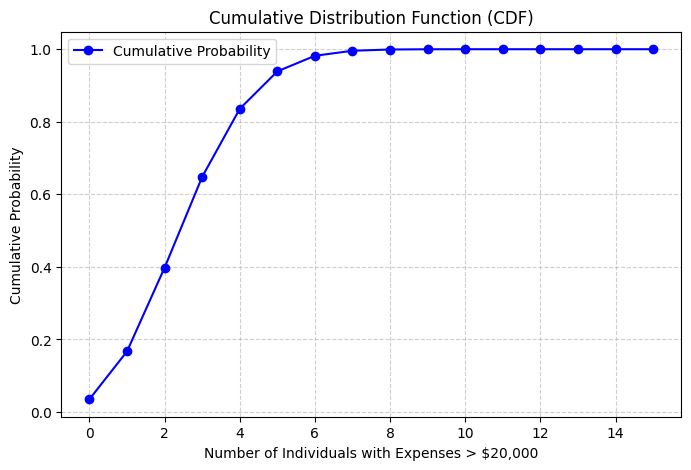

In [ ]:
# Question 2(c): Plot CDF
x = np.arange(0, n_expense + 1)
y = binom.cdf(x, n_expense, p_high_expense)

plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='o', linestyle='-', color='blue', label='Cumulative Probability')
plt.xlabel("Number of Individuals with Expenses > $20,000")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function (CDF)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


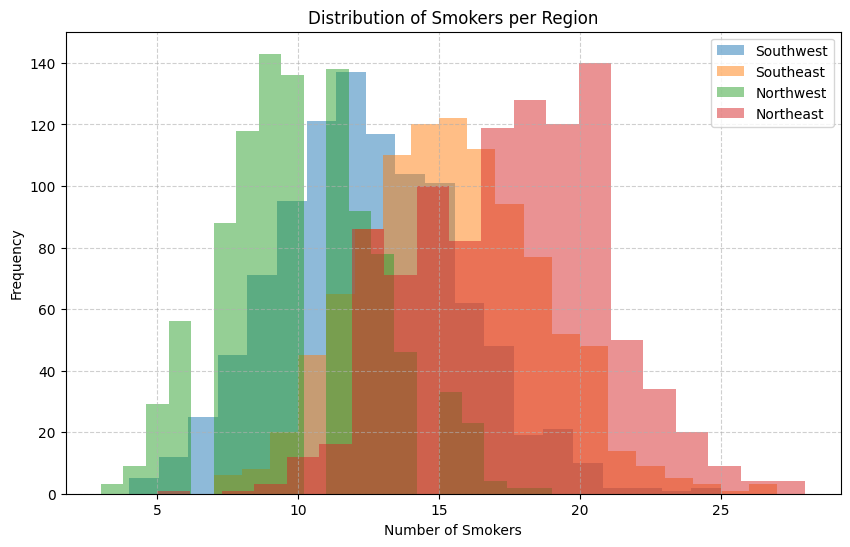

Expected number of smokers per region:
{'Southwest': 12.5, 'Southeast': 15.0, 'Northwest': 10.0, 'Northeast': 17.5}


In [ ]:
# Question 3: Estimating Regional Smoking Rates
regions = {"Southwest": 0.25, "Southeast": 0.3, "Northwest": 0.2, "Northeast": 0.35}
n_region = 50
simulations = 1000

# Simulate binomial distribution for each region
simulated_data = {region: np.random.binomial(n_region, p, simulations) for region, p in regions.items()}

# Plot histogram for each region
plt.figure(figsize=(10, 6))
for region, data in simulated_data.items():
    plt.hist(data, bins=20, alpha=0.5, label=region)

plt.xlabel("Number of Smokers")
plt.ylabel("Frequency")
plt.title("Distribution of Smokers per Region")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Compute expected number of smokers per region
expected_smokers = {region: n_region * p for region, p in regions.items()}
print("Expected number of smokers per region:")
print(expected_smokers)

Threshold number of smokers for top 10% risk classification: 19.0
Probability of selecting 8 high-risk individuals: 0.0058


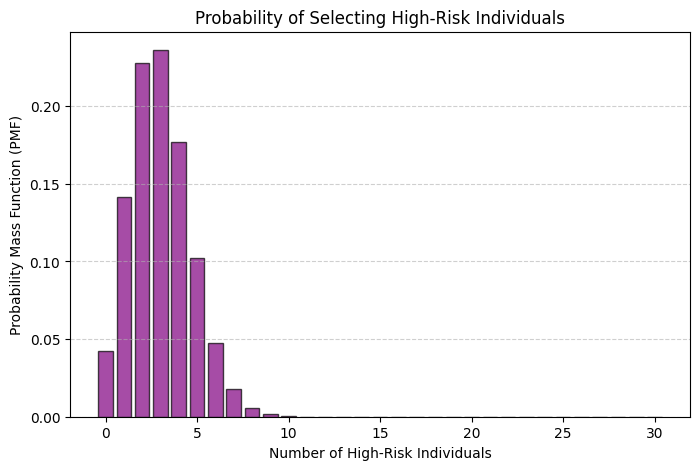

In [ ]:
# Question 4: Inverse Probability & Quantile Function
q_threshold = binom.ppf(0.9, n_region, p_smoker)
print(f"Threshold number of smokers for top 10% risk classification: {q_threshold}")

# Probability of selecting 8 high-risk individuals in a sample of 30
p_high_risk = binom.pmf(8, 30, 0.1)
print(f"Probability of selecting 8 high-risk individuals: {p_high_risk:.4f}")

# Plot PMF
x = np.arange(0, 31)
y = binom.pmf(x, 30, 0.1)

plt.figure(figsize=(8, 5))
plt.bar(x, y, color='purple', edgecolor='black', alpha=0.7)
plt.xlabel("Number of High-Risk Individuals")
plt.ylabel("Probability Mass Function (PMF)")
plt.title("Probability of Selecting High-Risk Individuals")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# Question 5: Probability of Having More than 3 Children
p_more_than_3 = 0.4
n_children = 12
k_children = 5

# Compute probability using Binomial CDF
prob_at_least_5 = 1 - binom.cdf(k_children - 1, n_children, p_more_than_3)
print(f"Probability of at least 5 individuals having more than 3 children: {prob_at_least_5:.4f}")

# Simulate binomial distribution for 1000 samples
simulated_children = np.random.binomial(n_children, p_more_than_3, 1000)

Probability of at least 5 individuals having more than 3 children: 0.5618


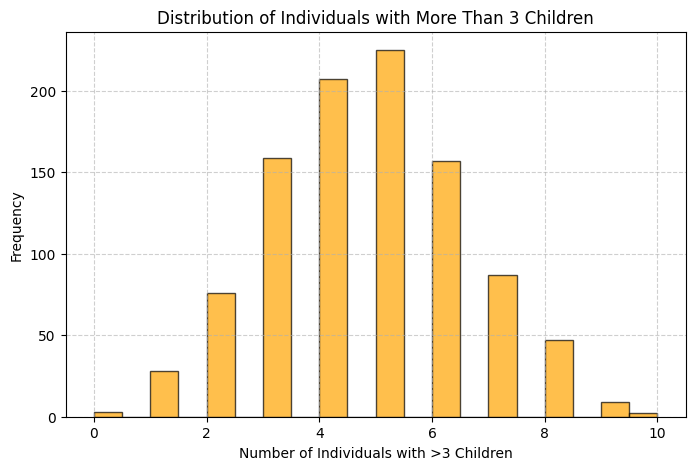

In [ ]:
# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(simulated_children, bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel("Number of Individuals with >3 Children")
plt.ylabel("Frequency")
plt.title("Distribution of Individuals with More Than 3 Children")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# Compare mean and variance of simulated results with theoretical values
simulated_mean = np.mean(simulated_children)
simulated_variance = np.var(simulated_children)
theoretical_mean = n_children * p_more_than_3
theoretical_variance = n_children * p_more_than_3 * (1 - p_more_than_3)
print(f"Simulated Mean: {simulated_mean:.4f}, Theoretical Mean: {theoretical_mean:.4f}")
print(f"Simulated Variance: {simulated_variance:.4f}, Theoretical Variance: {theoretical_variance:.4f}")

Simulated Mean: 4.6380, Theoretical Mean: 4.8000
Simulated Variance: 3.0410, Theoretical Variance: 2.8800
